# HERO CLASS RECOGNITION

In [1]:
import skimage
import numpy as np
from skimage.io import imread

import matplotlib.pyplot as plt
%matplotlib inline

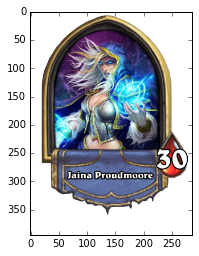

In [2]:
img = imread('../data/classes/mage_Jaina-Proudmoore.png')

plt.imshow(img)

In [3]:
import sys
sys.path.append("..")
from hearthstone.processing import Factory

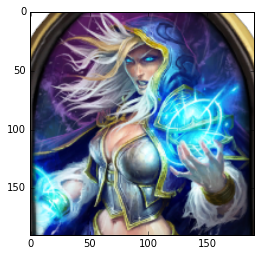

In [13]:
vyrez = Factory.cut_off_image(img, (40, 50), (190, 190))


plt.imshow(vyrez)

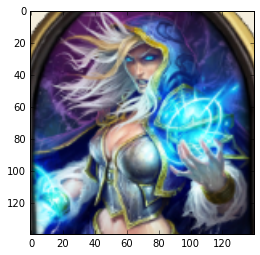

In [58]:
vyrez_resized = skimage.transform.resize(vyrez, (140, 140))
vyrez_resized = vyrez_resized[:,:,0:3]
plt.imshow(vyrez_resized)

In [16]:
import hearthstone.sides as hsd

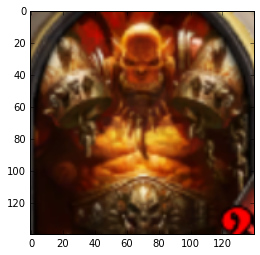

In [82]:
img2 = imread('../data/screenshots/Hearthstone Screenshot 04-14-17 15.44.50 - kopie.png')
img2 = skimage.transform.resize(img2, (1080, 1920), preserve_range=True)
img2 = np.asarray(img2, np.uint8)

plt.imshow(img2)
vyrez2 = Factory.cut_off_image(img2, hsd.OPPONENT_HERO_CLASS.loc, hsd.OPPONENT_HERO_CLASS.shape)
plt.imshow(vyrez2)

## Template-matching method

In [61]:
from skimage.feature import match_template
from os import listdir, path

In [90]:
results = {}
for f in listdir('../data/classes/'):
    name = f[:-4]
    f = path.join('../data/classes/', f)
    img = imread(f)
    vyrez = Factory.cut_off_image(img, (40, 50), (190, 190))
    vyrez_resized = skimage.transform.resize(vyrez, (140, 140))
    vyrez_resized = vyrez_resized[:,:,0:3]
    match_result = match_template(vyrez2, vyrez_resized)
    results[name] = np.squeeze(match_result)
    
#print(results)
key, value = max(results.iteritems(), key=lambda x:x[1])
print("Best match has '%s' with prob=%s" % (key, value))

name = key.split('_')[1].replace('-', ' ')
cl = key.split('_')[0]
cl = cl[0].upper() + cl[1:]

print('Name: %s   Class: %s' % (name, cl))

Best match has 'warrior_Garrosh-Hellscream' with prob=0.923209488392
Name: Garrosh Hellscream   Class: Warrior


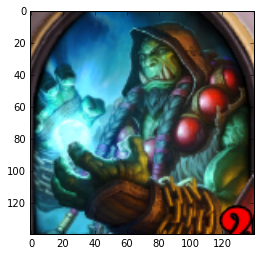

In [46]:
img3 = imread('data/screenshots/Hearthstone Screenshot 04-07-17 13.54.47.png')

plt.imshow(img3)
vyrez3 = Factory.cut_off_image(img3, (895, 130), (140, 140))
plt.imshow(vyrez3)

In [50]:
import numpy as np

In [54]:
np.histogram(vyrez3, bins=255)

(array([ 703,  142,  159,  137,  172,  140,  150,  165,  684,  451,  458,
         452,  492,  476,  425,  514, 1086,  526,  479,  518,  553,  547,
         534,  583,  976,  646,  582,  573,  694,  577,  632,  659,  710,
         855,  629,  647,  665,  633,  605,  568,  569,  665,  551,  551,
         506,  510,  474,  432,  486,  462,  438,  414,  422,  411,  383,
         417,  429,  493,  393,  376,  285,  341,  324,  322,  338,  316,
         358,  330,  305,  282,  299,  253,  275,  255,  282,  285,  263,
         243,  307,  303,  284,  248,  247,  254,  243,  222,  221,  222,
         256,  223,  221,  205,  242,  193,  232,  210,  217,  209,  180,
         181,  210,  210,  178,  185,  186,  200,  168,  199,  165,  174,
         162,  171,  163,  178,  184,  189,  166,  177,  135,  143,  141,
         138,  158,  148,  133,  139,  113,  144,  131,  117,  124,  133,
         129,  150,  134,  116,  139,  135,  105,  133,  120,  116,  126,
         122,  135,  104,  119,  132, 